In [1]:
%matplotlib inline
from copy import deepcopy as copy
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from disp import set_font_size, set_n_x_ticks, set_n_y_ticks
from replay import analysis

cc = np.concatenate


HMAP_PARAMS = {
    'FR_NTRJ_MIN_BLOWUP': 1.25,  # Hz
    'FR_NTRJ_TRJ_BLOWUP_RATIO': .2,  # frac
}

def evt_frq_hmap(f_name, v_mins, v_maxs, hmap_params):
    """Make heatmaps of spontaneous replay event frequency given param sweep file."""
    
    df, rslts, header = analysis.make_df(f_name)
    params_varied = header['params_varied']
    assert len(params_varied) == 2
    
    n_trials = header['sweep_params']['N_TRIALS']
    dur = header['s_params']['schedule']['D_SMLN'] - header['a_params']['MIN_START']
    
    # get data into numpy arrays
    p_0 = np.array(df[params_varied[0]])
    p_1 = np.array(df[params_varied[1]])
    
    p_0_min = np.min(p_0)
    p_0_max = np.max(p_0)
    p_0_range = p_0_max - p_0_min
    
    p_1_min = np.min(p_1)
    p_1_max = np.max(p_1)
    p_1_range = p_1_max - p_1_min
    
    fr_trj = np.array(df['FR_TRJ'])
    fr_ntrj = np.array(df['FR_NTRJ'])
    
    print('Min fr_trj = ', np.nanmin(fr_trj), 'Hz')
    print('Max fr_trj = ', np.nanmax(fr_trj), 'Hz')
    print('Min fr_ntrj = ', np.nanmin(fr_ntrj), 'Hz')
    print('Max fr_ntrj = ', np.nanmax(fr_ntrj), 'Hz')
    
    evt_ct = np.array(df['EVT_CT'])
    evt_frq = evt_ct / dur
    
    print('Min evt_ct = ', np.min(evt_ct))
    print('Max evt_ct = ', np.max(evt_ct))
    print('Min evt_frq = ', np.min(evt_frq), 'Hz')
    print('Max evt_frq = ', np.max(evt_frq), 'Hz')
    
    # make plots
    fig, axs = plt.subplots(2, 2, figsize=(13, 10.5), tight_layout=True)
    
    ## fr trj
    im_00 = axs[0, 0].scatter(p_0, p_1, c=fr_trj, marker='s', vmin=v_mins['fr_trj'], vmax=v_maxs['fr_trj'])
    axs[0, 0].set_title('LTP-IE-tagged firing rates')
    cb_00 = fig.colorbar(im_00, ax=axs[0, 0])
    cb_00.set_label('Firing rate (Hz)', fontsize=16)

    ## fr ntrj
    im_01 = axs[0, 1].scatter(p_0, p_1, c=fr_ntrj, marker='s', vmin=v_mins['fr_ntrj'], vmax=v_maxs['fr_ntrj'])
    axs[0, 1].set_title('Non-LTP-IE-tagged firing rates')
    cb_01 = fig.colorbar(im_01, ax=axs[0, 1])
    cb_01.set_label('Firing rate (Hz)', fontsize=16)
    
    ## evt frq
    im_10 = axs[1, 0].scatter(p_0, p_1, c=evt_frq, marker='s', vmin=v_mins['evt_frq'], vmax=v_maxs['evt_frq'])
    axs[1, 0].set_title('Event frequency')
    cb_10 = fig.colorbar(im_10, ax=axs[1, 0])
    cb_10.set_label('Event frequency (Hz)', fontsize=16)
    
    ## replay zones
    ### plot event freq
    im_11 = axs[1, 1].scatter(
        p_0, p_1, c=evt_frq, marker='s', vmin=v_mins['evt_frq'], vmax=v_maxs['evt_frq'], cmap='plasma', zorder=0)
    axs[1, 1].set_title('Replay regimes')
    cb_11 = fig.colorbar(im_11, ax=axs[1, 1])
    cb_11.set_label('Event frequency (Hz)', fontsize=16)
    
    ### set blowup vals to green
    mask = \
        (fr_ntrj >= hmap_params['FR_NTRJ_MIN_BLOWUP']) \
        | (fr_ntrj / fr_trj >= hmap_params['FR_NTRJ_TRJ_BLOWUP_RATIO'])
    axs[1, 1].scatter(
        p_0[mask], p_1[mask], c=(0, 1, 0), marker='s', zorder=2)
    
    for ax in axs.flatten():
        
        ax.set_xlim(p_0_min - .05*p_0_range, p_0_max + .05*p_0_range)
        ax.set_ylim(p_1_min - .05*p_1_range, p_1_max + .05*p_1_range)
        
        ax.set_xlabel(params_varied[0])
        ax.set_ylabel(params_varied[1])
        
        ax.set_facecolor((.8, .8, .8))
        set_font_size(ax, 16)

    # get blowup mask
    
    # assign colors
    
    return df, rslts, header

/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Min fr_trj =  2.620115629984053 Hz
Max fr_trj =  18.783534435438582 Hz
Min fr_ntrj =  0.009121474721685462 Hz
Max fr_ntrj =  18.759473360696088 Hz
Min evt_ct =  0.0
Max evt_ct =  69.9
Min evt_frq =  0.0 Hz
Max evt_frq =  7.1692307692307695 Hz


/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in greater_equal


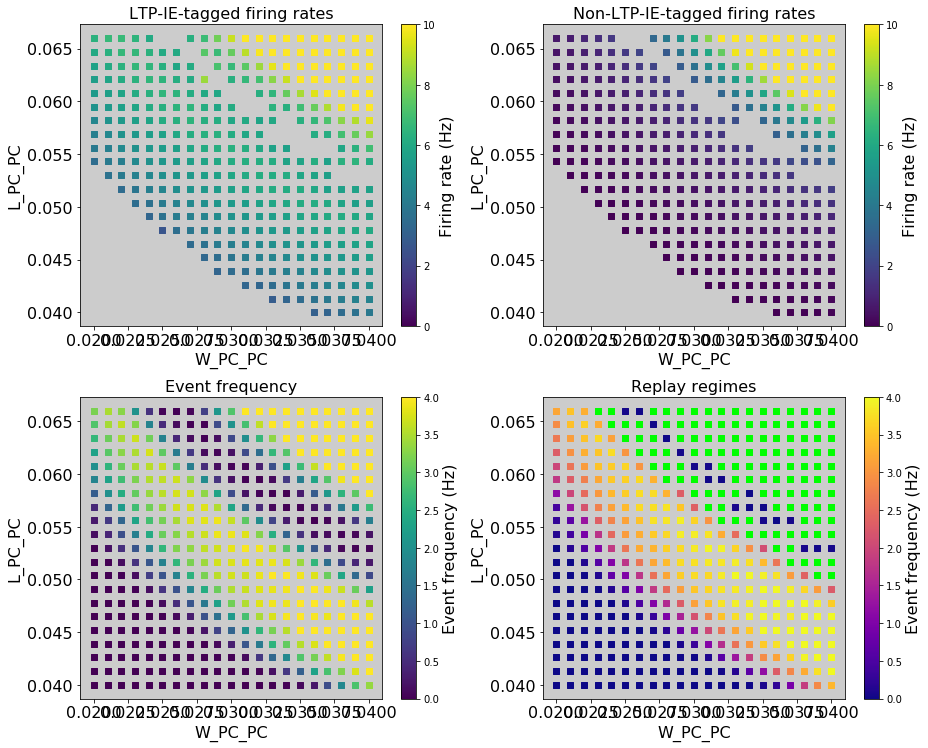

In [2]:
v_mins = {'fr_trj': 0, 'fr_ntrj': 0, 'evt_frq': 0}
v_maxs = {'fr_trj': 10, 'fr_ntrj': 10, 'evt_frq': 4}

dfs, rslts, header = evt_frq_hmap('PARAM_SWEEP_RESULTS_0_W_PC_PC_L_PC_PC.txt', v_mins, v_maxs, HMAP_PARAMS)

/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Min fr_trj =  3.5414298388423195 Hz
Max fr_trj =  16.90128616072762 Hz
Min fr_ntrj =  0.04044118528460312 Hz
Max fr_ntrj =  16.806344190740372 Hz
Min evt_ct =  0.1
Max evt_ct =  74.9
Min evt_frq =  0.010256410256410256 Hz
Max evt_frq =  7.682051282051282 Hz


/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in greater_equal


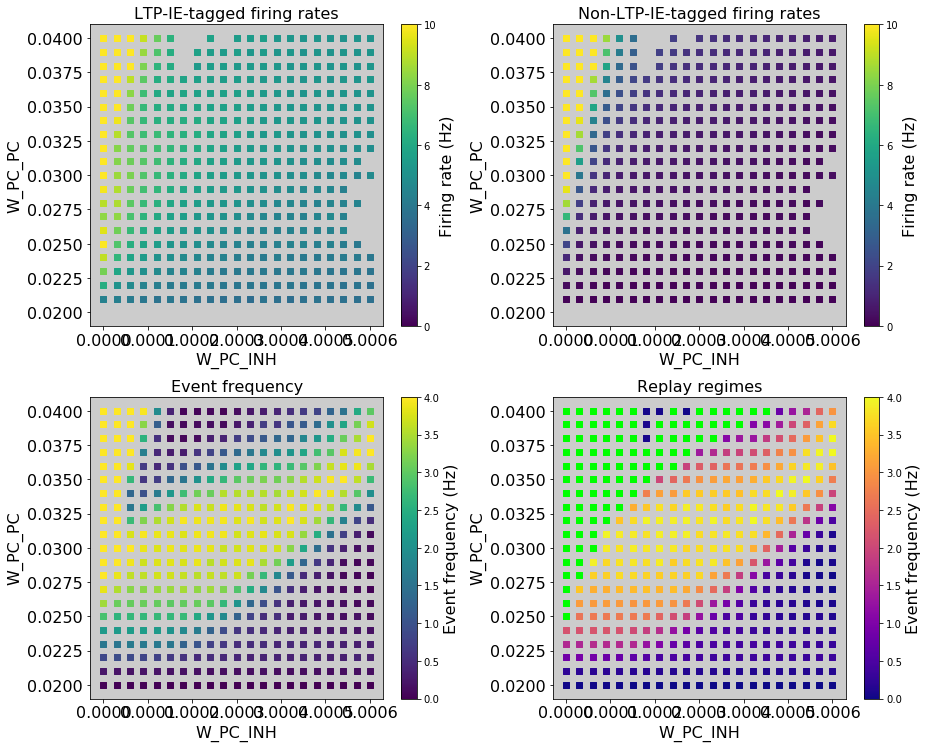

In [3]:
v_mins = {'fr_trj': 0, 'fr_ntrj': 0, 'evt_frq': 0}
v_maxs = {'fr_trj': 10, 'fr_ntrj': 10, 'evt_frq': 4}

dfs, rslts, header = evt_frq_hmap('PARAM_SWEEP_RESULTS_1_W_PC_PC_W_PC_INH.txt', v_mins, v_maxs, HMAP_PARAMS)

/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Min fr_trj =  3.277344705236386 Hz
Max fr_trj =  19.541967259921094 Hz
Min fr_ntrj =  0.024967464967982005 Hz
Max fr_ntrj =  19.406589578156744 Hz
Min evt_ct =  0.0
Max evt_ct =  63.4
Min evt_frq =  0.0 Hz
Max evt_frq =  6.5025641025641026 Hz


/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in greater_equal


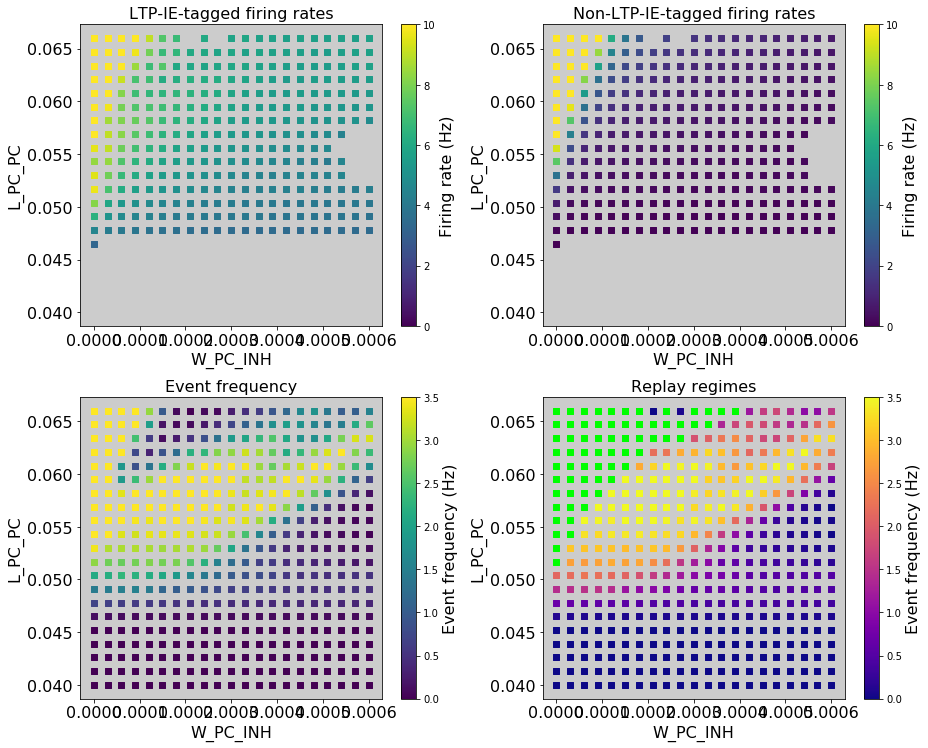

In [4]:
v_mins = {'fr_trj': 0, 'fr_ntrj': 0, 'evt_frq': 0}
v_maxs = {'fr_trj': 10, 'fr_ntrj': 10, 'evt_frq': 3.5}

dfs, rslts, header = evt_frq_hmap('PARAM_SWEEP_RESULTS_3_L_PC_PC_W_PC_INH.txt', v_mins, v_maxs, HMAP_PARAMS)